<a href="https://colab.research.google.com/github/Jayasurya227/Black-Friday-Sales-Analysis/blob/main/Cracking_the_Code_An_Inside_Look_at_Netflix's_Content_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1)Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

sns.set_style('darkgrid')

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**2) Load the Data Set**

In [ ]:
netflix_df=pd.read_csv("/content/netflix_titles.csv")
netflix_df.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

In [ ]:
netflix_df.shape

(7787, 12)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

**3)Data Cleaning and the Transformation**

In [ ]:
netflix_df.isnull()

show_id   type  title  director   cast  country  date_added  \
0       False  False  False      True  False    False       False   
1       False  False  False     False  False    False       False   
2       False  False  False     False  False    False       False   
3       False  False  False     False  False    False       False   
4       False  False  False     False  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
7782    False  False  False     False  False    False       False   
7783    False  False  False     False  False    False       False   
7784    False  False  False      True  False     True       False   
7785    False  False  False      True  False    False       False   
7786    False  False  False     False   True    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False     False      False        False  
2            False   False     False      False        False  
3            False   False     False      False        False  
4            False   False     False      False        False  
...            ...     ...       ...        ...          ...  
7782         False   False     False      False        False  
7783         False   False     False      False        False  
7784         False   False     False      False        False  
7785         False   False     False      False        False  
7786         False   False     False      False        False  

[7787 rows x 12 columns]

In [ ]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Fill Missing Values
netflix_df['director']=netflix_df['director'].fillna('unknown')
netflix_df['cast']=netflix_df['cast'].fillna('unknown')

In [ ]:
netflix_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
#Missing Values
netflix_df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [ ]:
mode_country = netflix_df['country'].mode()[0]
netflix_df['country']=netflix_df['country'].fillna(mode_country)

In [ ]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [ ]:
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'],format='mixed',dayfirst=False)


In [ ]:
netflix_df['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

In [ ]:
netflix_df['year_added']=netflix_df['date_added'].dt.year

In [ ]:
netflix_df['month_added']=netflix_df['date_added'].dt.month

In [ ]:
netflix_df.head(2)

show_id     type title           director  \
0      s1  TV Show    3%            unknown   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  year_added  month_added  
0  In a future where the elite inhabit an island ...        2020            8  
1  After a devastating earthquake hits Mexico Cit...        2016           12

In [ ]:
#verify our cleaning and transformation
print("\Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\Data types after transformation:")
print(netflix_df.dtypes)

\Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64
\Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-3598474345.py:2: SyntaxWarning: invalid escape sequence '\M'
  print("\Missing values after cleaning:")
/tmp/ipython-input-3598474345.py:4: SyntaxWarning: invalid escape sequence '\D'
  print("\Data types after transformation:")


**4)Exploreatory Data Analysis&Visualization**

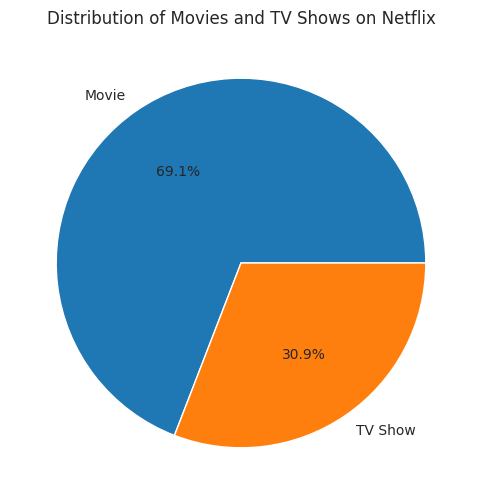

In [ ]:
plt.figure(figsize=(8,6))
type_counts=netflix_df['type'].value_counts()
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.show()

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [ ]:
content_added_over_time=netflix_df.groupby(['year_added','type']).size().unstack().fillna(0)
content_added_over_time

type         Movie  TV Show
year_added                 
2008           1.0      1.0
2009           2.0      0.0
2010           1.0      0.0
2011          13.0      0.0
2012           3.0      0.0
2013           6.0      5.0
2014          19.0      6.0
2015          58.0     30.0
2016         256.0    184.0
2017         861.0    361.0
2018        1255.0    429.0
2019        1497.0    656.0
2020        1312.0    697.0
2021          88.0     29.0

<Figure size 1800x1000 with 0 Axes>

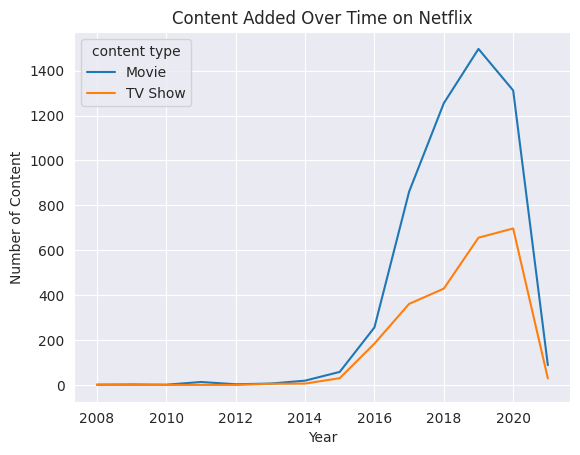

In [ ]:
content_added_over_time=netflix_df.groupby(['year_added','type']).size().unstack().fillna(0)
plt.figure(figsize=(18,10))
content_added_over_time.plot(kind='line')
plt.title('Content Added Over Time on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.legend(title='content type')
plt.grid(True)
plt.show()

In [ ]:
netflix_df.head(1)

show_id     type title director  \
0      s1  TV Show    3%  unknown   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  year_added  month_added  
0  In a future where the elite inhabit an island ...        2020            8

In [ ]:
genre=netflix_df.assign(genre=netflix_df['listed_in'].str.split()).explode('genre')
genre

show_id     type                                    title  director  \
0         s1  TV Show                                       3%   unknown   
0         s1  TV Show                                       3%   unknown   
0         s1  TV Show                                       3%   unknown   
0         s1  TV Show                                       3%   unknown   
0         s1  TV Show                                       3%   unknown   
...      ...      ...                                      ...       ...   
7785   s7786  TV Show                    Zumbo's Just Desserts   unknown   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  Sam Dunn   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  Sam Dunn   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  Sam Dunn   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  Sam Dunn   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
...                                                 ...   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                            unknown   
7786                                            unknown   
7786                                            unknown   
7786                                            unknown   

                                    country date_added  release_year rating  \
0                                    Brazil 2020-08-14          2020  TV-MA   
0                                    Brazil 2020-08-14          2020  TV-MA   
0                                    Brazil 2020-08-14          2020  TV-MA   
0                                    Brazil 2020-08-14          2020  TV-MA   
0                                    Brazil 2020-08-14          2020  TV-MA   
...                                     ...        ...           ...    ...   
7785                              Australia 2020-10-31          2019  TV-PG   
7786  United Kingdom, Canada, United States 2020-03-01          2019  TV-MA   
7786  United Kingdom, Canada, United States 2020-03-01          2019  TV-MA   
7786  United Kingdom, Canada, United States 2020-03-01          2019  TV-MA   
7786  United Kingdom, Canada, United States 2020-03-01          2019  TV-MA   

       duration                                          listed_in  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
...         ...                                                ...   
7785   1 Season                 International TV Shows, Reality TV   
7786     90 min                    Documentaries, Music & Musicals   
7786     90 min                    Documentaries, Music & Musicals   
7786     90 min                    Documentaries, Music & Musicals   
7786     90 min                    Documentaries, Music & Musicals   

                                            description  year_added  \
0     In a future where the elite inhabit an island ...        2020   
0     In a future where the elite inhabit an island ...        2020   
0     In a future where the elite inhabit an island ...        2020   
0     In a future where the elite inhabit an island ...        2020   
0     In a future where the elite inhabit an island ...        2020   
...                                                 ...         ...   
7785  Dessert wizard Adriano Zumbo looks for the nex...        2020   
7786  This documentary de

In [ ]:
genre_count=genre['genre'].value_counts().reset_index()
genre_count.columns=['genre','count']

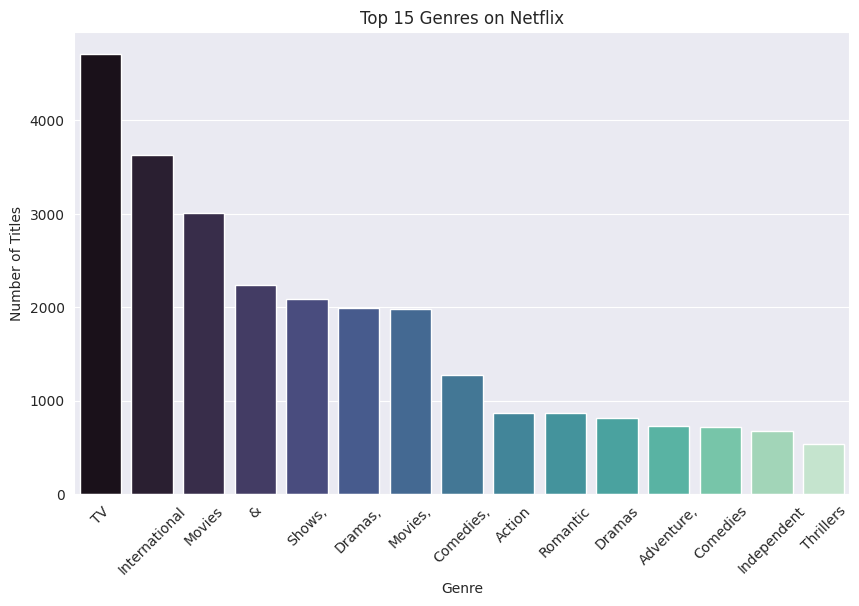

In [ ]:
top_15_genres=genre_count.head(15)
plt.figure(figsize=(10,6))
sns.barplot(x='genre',y='count',data=top_15_genres,palette='mako',hue='genre',legend=False)
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Top 15 Genres on Netflix')
plt.xticks(rotation=45)
plt.show()

In [ ]:
netflix_df[netflix_df['type']=='Movie'].copy()

show_id   type                                    title  \
1         s2  Movie                                     7:19   
2         s3  Movie                                    23:59   
3         s4  Movie                                        9   
4         s5  Movie                                       21   
6         s7  Movie                                      122   
...      ...    ...                                      ...   
7781   s7782  Movie                                     Zoom   
7782   s7783  Movie                                     Zozo   
7783   s7784  Movie                                   Zubaan   
7784   s7785  Movie                        Zulu Man in Japan   
7786   s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6       Yasir Al Yasiri  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
...                 ...                                                ...   
7781       Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            unknown                                            Nasty C   
7786           Sam Dunn                                            unknown   

                                                country date_added  \
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
6                                                 Egypt 2020-06-01   
...                                                 ...        ...   
7781                                      United States 2020-01-11   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating duration  \
1             2016  TV-MA   93 min   
2             2011      R   78 min   
3             2009  PG-13   80 min   
4             2008  PG-13  123 min   
6             2019  TV-MA   95 min   
...            ...    ...      ...   
7781          2006     PG   88 min   
7782          2005  TV-MA   99 min   
7783          2015  TV-14  111 min   
7784          2019  TV-MA   44 min   
7786          2019  TV-MA   90 min   

                                              listed_in  \
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
6                   Horror Movies, International Movies   
...                                                 ...   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7786                    Documentaries, Music & Musicals   

                                            description  year_added  \
1     After a devastating earthquake hits Mexico Cit...        2016   
2     When an army recruit is found dead, his fellow...        2018   
3     In a postapocalyptic world, rag-doll robots hi...        2017   
4     A 

In [ ]:
movies_df=netflix_df[netflix_df['type']=='Movie'].copy()
tv_show_df=netflix_df[netflix_df['type']=='TV Show'].copy()

In [ ]:
#Cleaning and converting duration for movies
movies_df['duration_min']=movies_df['duration'].str.replace('min','').astype(int)
#Cleaning and converting duration for TV shows
tv_show_df['season']=tv_show_df['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)

In [ ]:
movies_df.head(2)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating duration                            listed_in  \
1          2016  TV-MA   93 min         Dramas, International Movies   
2          2011      R   78 min  Horror Movies, International Movies   

                                         description  year_added  month_added  \
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   

   duration_min  
1            93  
2            78

In [ ]:
tv_show_df.head(2)

show_id     type title     director  \
0      s1  TV Show    3%      unknown   
5      s6  TV Show    46  Serdar Akar   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...  Turkey 2017-07-01   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
5          2016  TV-MA   1 Season   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
5    International TV Shows, TV Dramas, TV Mysteries   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
5  A genetics professor experiments with a treatm...        2017            7   

   season  
0       4  
5       1

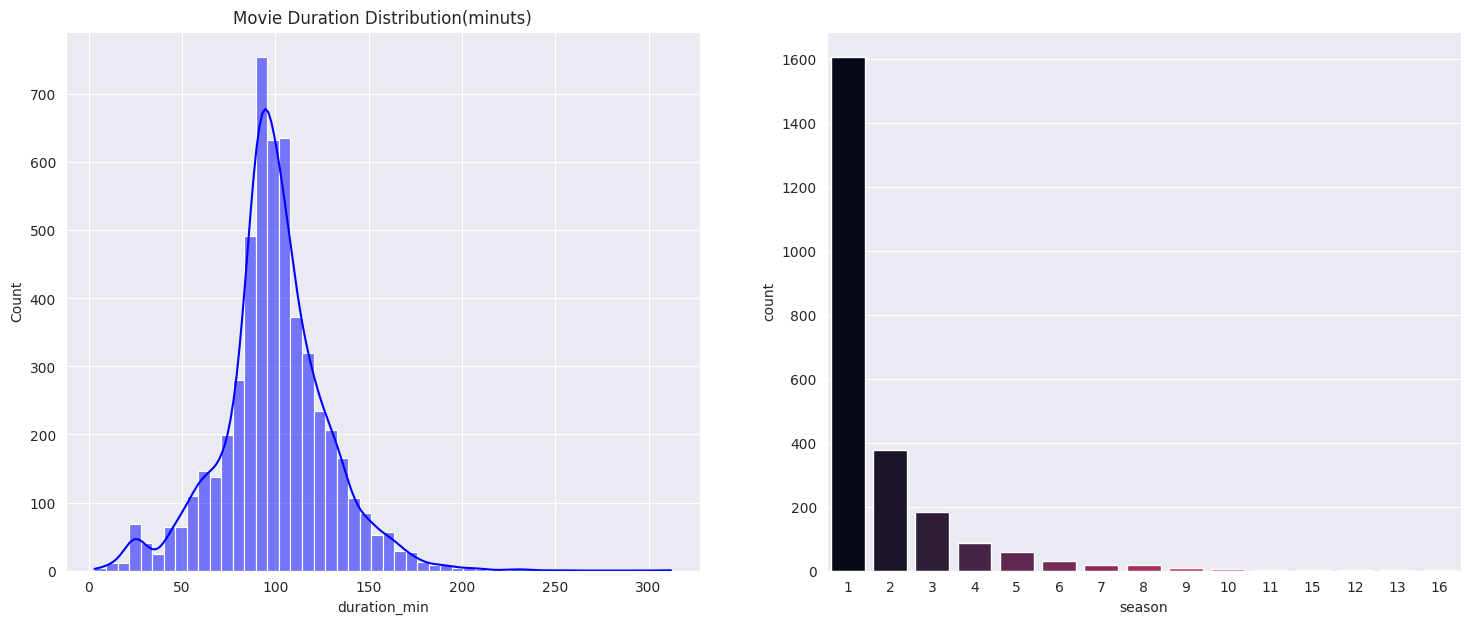

In [ ]:
#plot distribution
fig,axes=plt.subplots(1,2,figsize=(18,7))
#Movie Duration Distribution
sns.histplot(ax=axes[0],x='duration_min',bins=50,kde=True,color='blue',data=movies_df).set_title('Movie Duration Distribution(minuts)')
#TV Show Season Distribution
sns.countplot(ax=axes[1],x='season',data=tv_show_df,palette='rocket',order=tv_show_df['season'].value_counts().index,hue='season',legend=False)
plt.show()

In [ ]:
netflix_df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        United States
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7770, dtype: object

In [ ]:
countries=netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')
countries

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784            unknown                                            Nasty C   
7785            unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            unknown   
7786           Sam Dunn                                            unknown   
7786           Sam Dunn                                            unknown   

             country date_added  release_year rating   duration  \
0             Brazil 2020-08-14          2020  TV-MA  4 Seasons   
1             Mexico 2016-12-23          2016  TV-MA     93 min   
2          Singapore 2018-12-20          2011      R     78 min   
3      United States 2017-11-16          2009  PG-13     80 min   
4      United States 2020-01-01          2008  PG-13    123 min   
...              ...        ...           ...    ...        ...   
7784   United States 2020-09-25          2019  TV-MA     44 min   
7785       Australia 2020-10-31          2019  TV-PG   1 Season   
7786  United Kingdom 2020-03-01          2019  TV-MA     90 min   
7786          Canada 2020-03-01          2019  TV-MA     90 min   
7786   United States 2020-03-01          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   
7786                    Documentaries, Music & Musicals   
7786                    Documentaries, Music & Musicals   

                                            description  year_added  \
0     In a future where the elite inhabit an island ...        2020   
1     After a devastating earthquake hits Mexico Cit...        2016   
2     When an army recruit is found dead, his fellow...        2018   
3     In a postapocalyptic world, rag-doll robots hi...        2017   
4     A brilliant group of students become card-coun...        2020   
...                                                 ...         ...   
7784  In this documentary, South African rapper Nast...        2020   
7785  Dessert wizard Adriano Zumbo looks for the nex...        2020   
7786  This documentary delves into the mystique behi...        2020   
7786  This documentary delves into the mystique beh

In [ ]:
top_10_countries=countries['country'].value_counts().reset_index()
top_10_countries

country  count
0      United States   3792
1              India    990
2     United Kingdom    721
3             Canada    412
4             France    349
..               ...    ...
116           Panama      1
117  United Kingdom,      1
118           Uganda      1
119     East Germany      1
120       Montenegro      1

[121 rows x 2 columns]

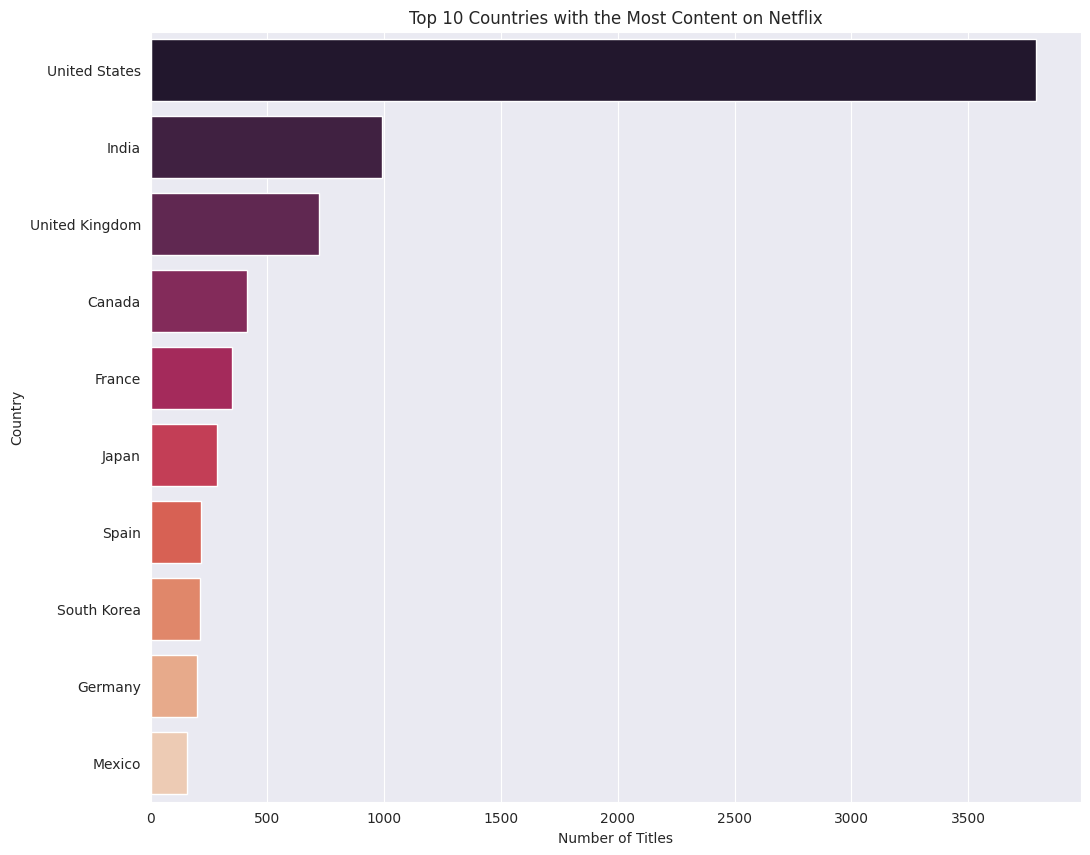

In [ ]:
top_countries_counts_plot=top_10_countries.head(10)
plt.figure(figsize=(12,10))
sns.barplot(y='country',x='count',data=top_countries_counts_plot,palette='rocket',hue='country',legend=False)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.show()

4.6 Whar are the maturity ratings of the content

In [ ]:
netflix_df['rating'].value_counts().index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
      dtype='object', name='rating')

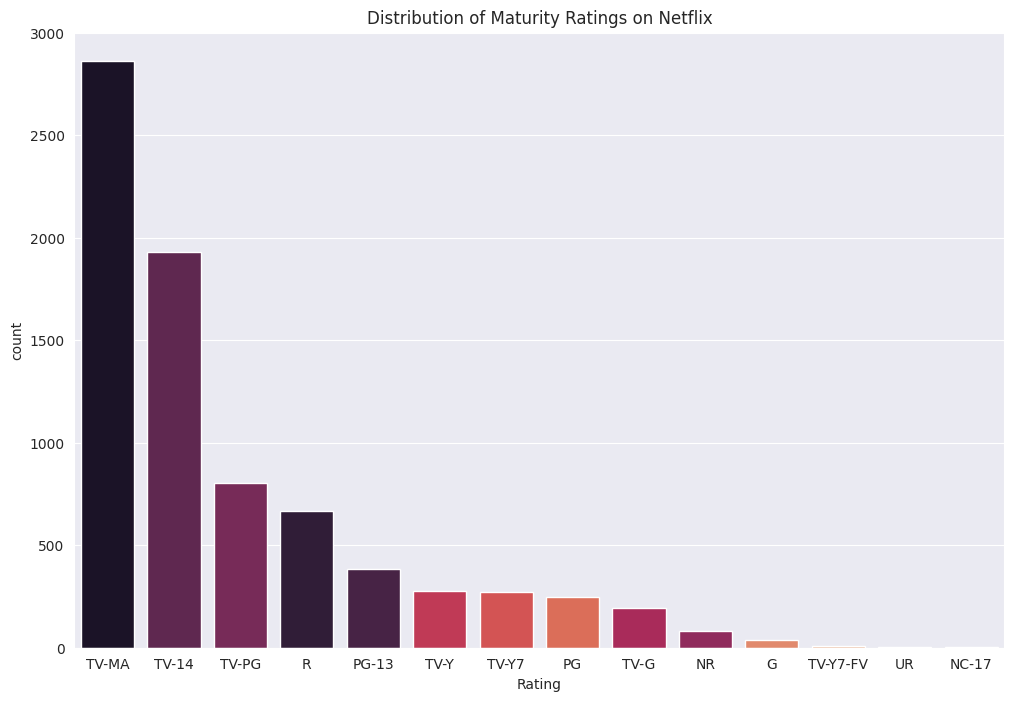

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=netflix_df,order=netflix_df['rating'].value_counts().index,palette='rocket',hue='rating',legend=False)
plt.xlabel('Rating')
plt.ylabel('count')
plt.title('Distribution of Maturity Ratings on Netflix')
plt.show()

**5)Feature Engineering -Content Freshness**

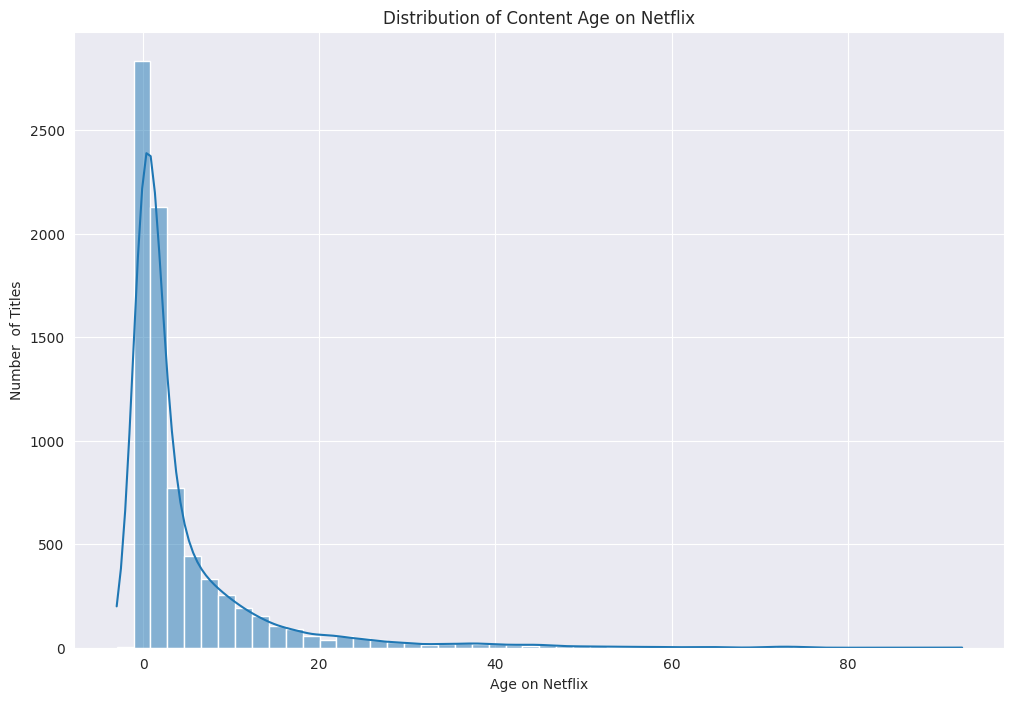

In [ ]:
netflix_df['age_on_netflix']=netflix_df['year_added']-netflix_df['release_year']
plt.figure(figsize=(12,8))
sns.histplot(data=netflix_df,x='age_on_netflix',bins=50,kde=True)
plt.title('Distribution of Content Age on Netflix')
plt.xlabel('Age on Netflix')
plt.ylabel('Number  of Titles')
plt.show()

**Deeper Multivaraite Analysis**

In [ ]:
genre.head(2)

show_id     type title director  \
0      s1  TV Show    3%  unknown   
0      s1  TV Show    3%  unknown   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
0  In a future where the elite inhabit an island ...        2020            8   

           genre  
0  International  
0             TV

In [ ]:
#Analyze movie duration across diffrent top genres
top_genres=genre['genre'].value_counts().index[:5]
genres_movies=genre[(genre['type'] == 'Movie') & (genre['genre'].isin(top_genres))].copy()


In [ ]:
genres_movies['duration_in_min']=genres_movies['duration'].str.replace('min','').astype(int)

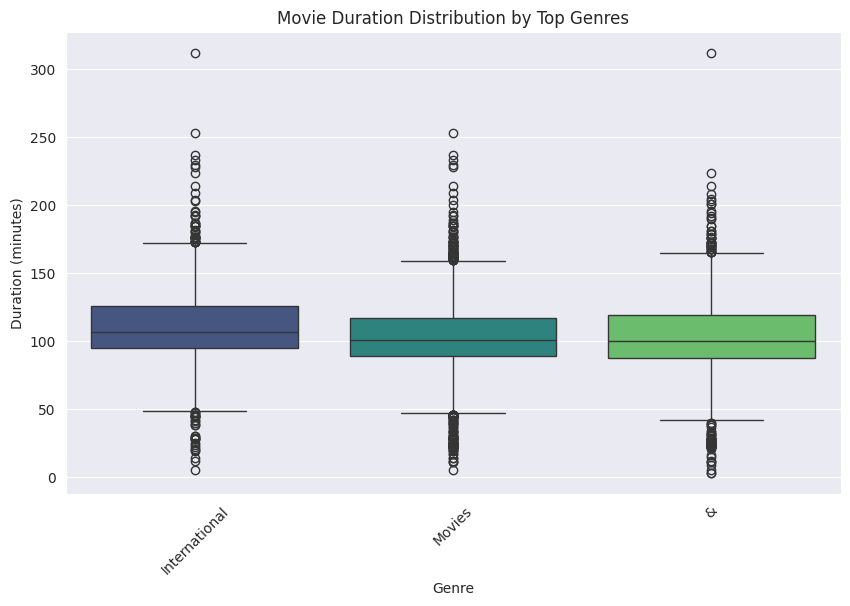

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='genre',y='duration_in_min',data=genres_movies,palette='viridis',hue='genre',legend=False)
plt.title('Movie Duration Distribution by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Word Cloud from Content Description**

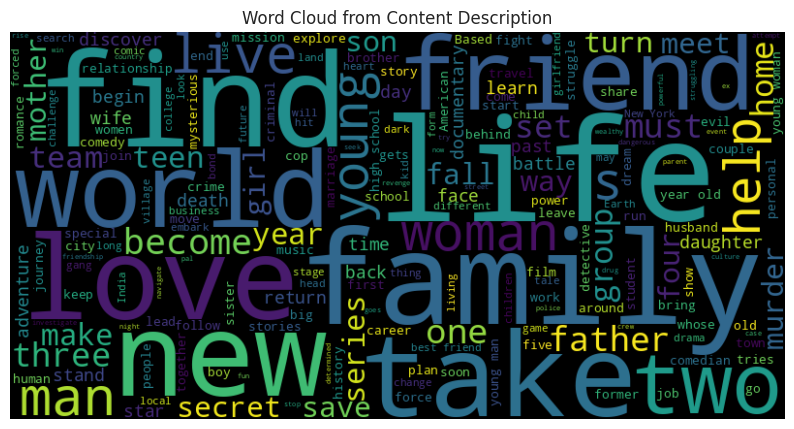

In [ ]:
from wordcloud import WordCloud

text=' '.join(netflix_df['description'])
wordcloud=WordCloud(width=800,height=400,background_color='black').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Content Description')
plt.show()

**QUESTIONS**

1)Who are the Top Directors

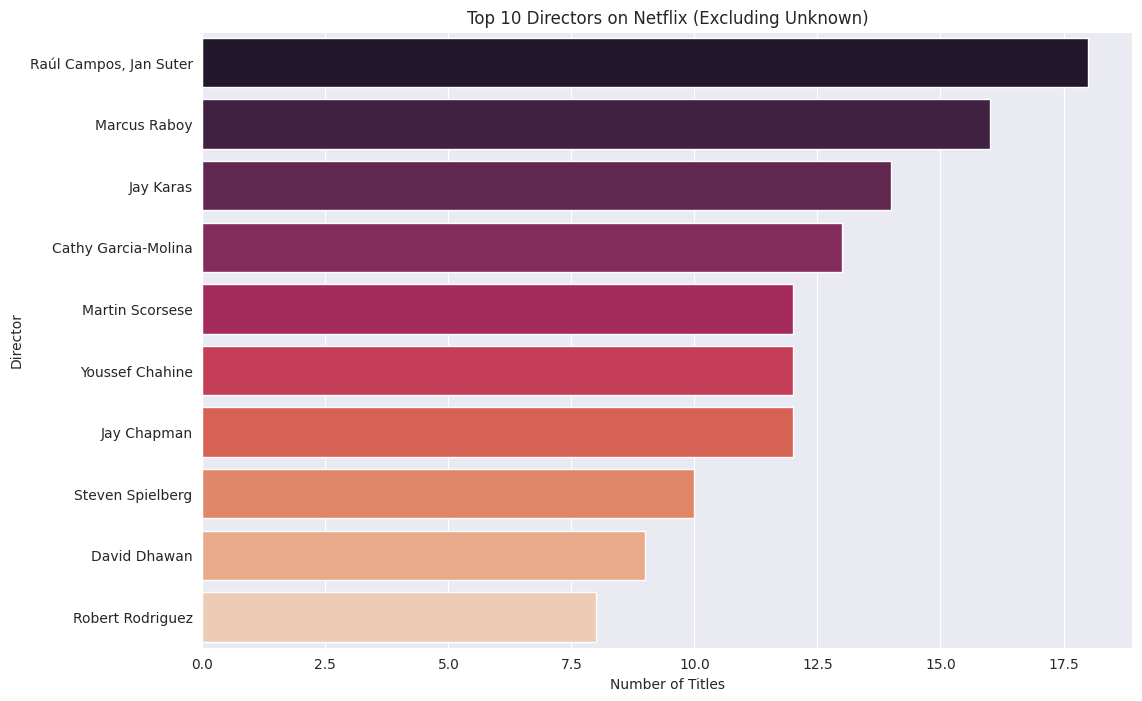

In [ ]:
director_counts = netflix_df['director'].value_counts()
top_directors = director_counts[1:].head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket', hue=top_directors.index, legend=False)
plt.title('Top 10 Directors on Netflix (Excluding Unknown)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

2)How has the distrubution of content ratings changed over time

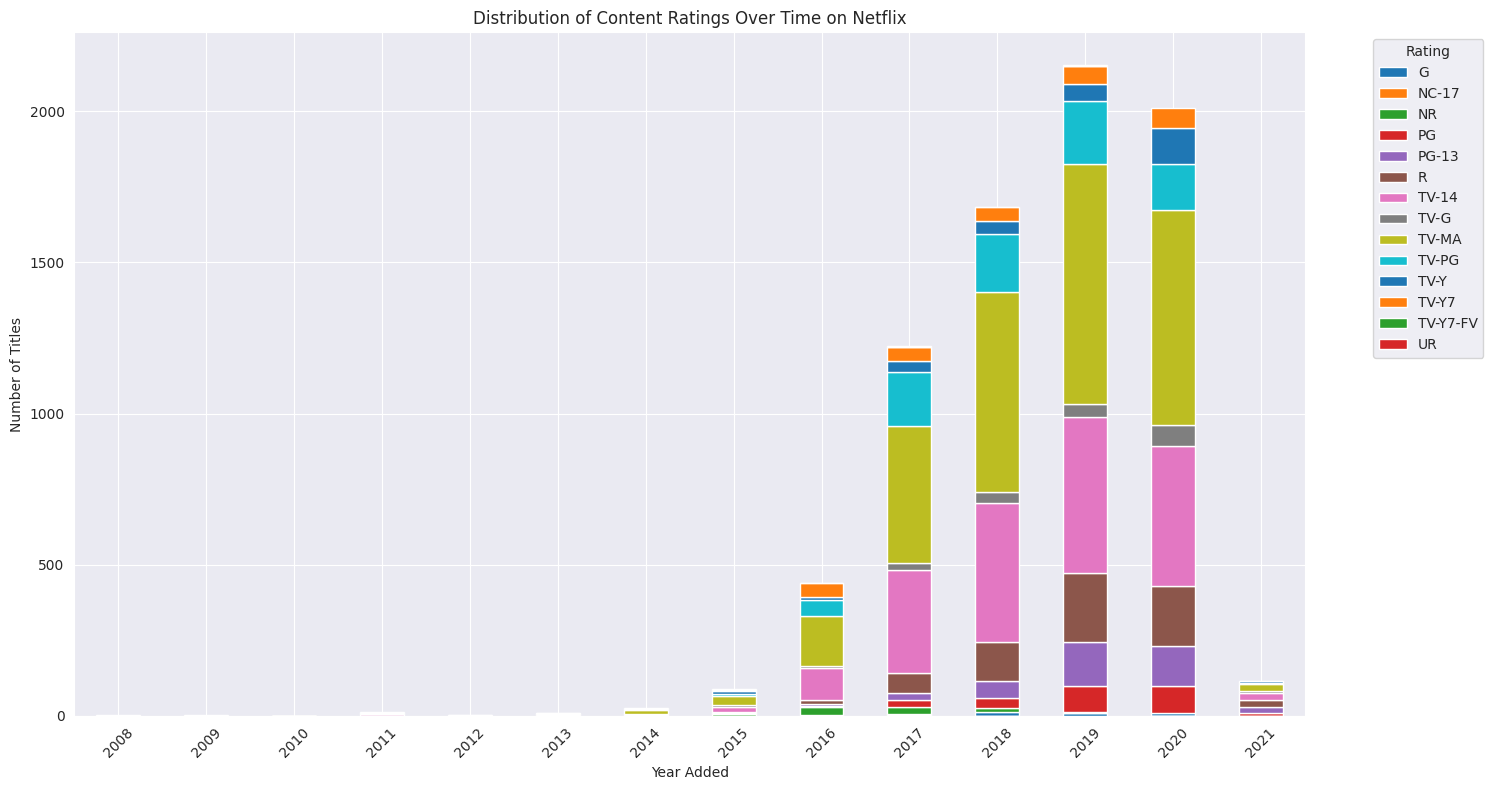

In [ ]:
rating_over_time = netflix_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)
rating_over_time.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Content Ratings Over Time on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3)Is there a relationship between content and age and its type(Movie vs.TV Show)

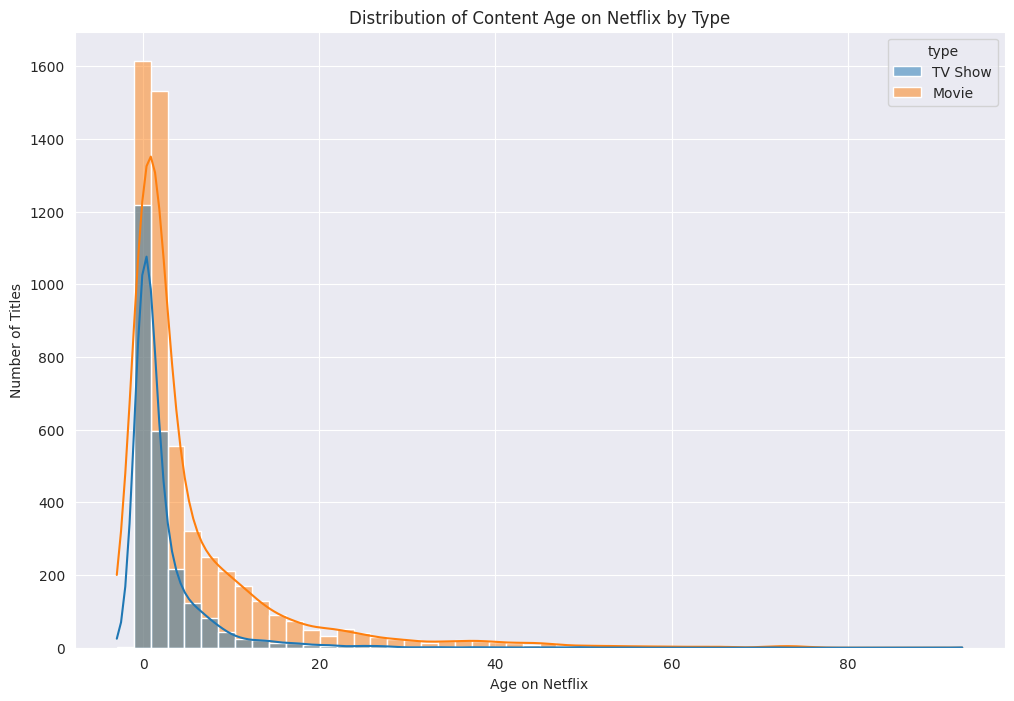

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=netflix_df, x='age_on_netflix', hue='type', bins=50, kde=True)
plt.title('Distribution of Content Age on Netflix by Type')
plt.xlabel('Age on Netflix')
plt.ylabel('Number of Titles')
plt.show()

4)Can we identify any trends in content production based on the relese year vs.the year added tonetflix

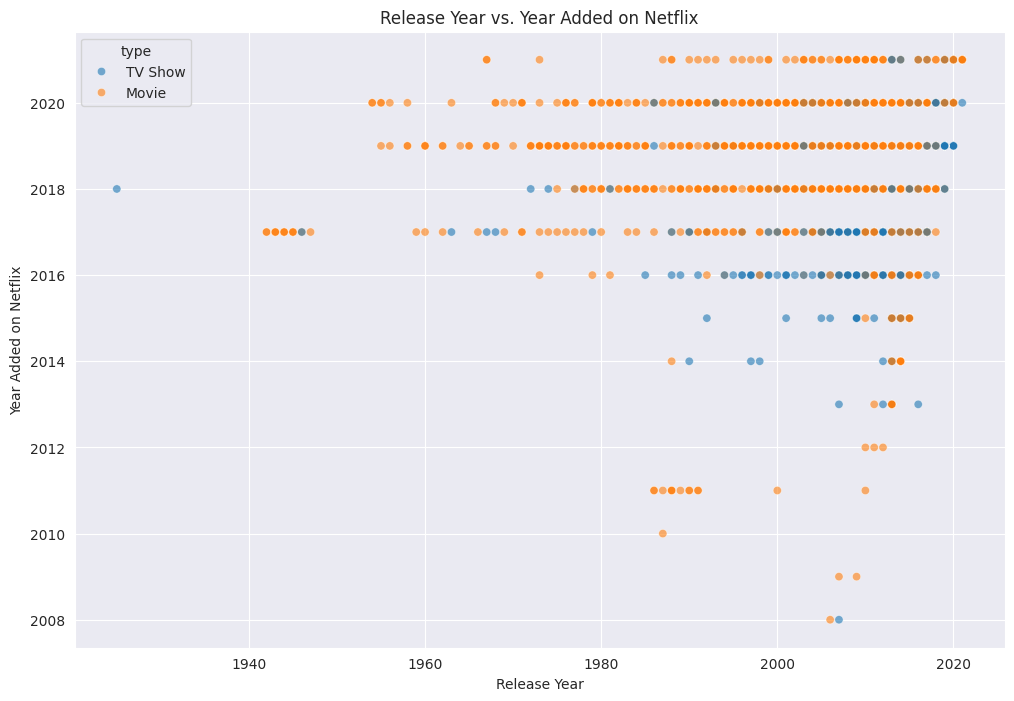

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=netflix_df, x='release_year', y='year_added', hue='type', alpha=0.6)
plt.title('Release Year vs. Year Added on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added on Netflix')
plt.show()

In [ ]:
#Install ydata-profelling
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
#Generate the profelling report
from ydata_profiling import ProfileReport
profile=ProfileReport(netflix_df,title="Netflix Dataset Profiling Report")

#Display the Report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00, 11.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Save the report to an HTML Report
profile.to_file("Netflix_Dataset Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]